In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)
import matplotlib
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

# connecting multicalibration to differential fairness

- **Q1**: when a model $R$ satisfies $\alpha$-multicalibration, what value of $\epsilon$-DC does it satisfy? (what is the bound on $\epsilon$?
- **Q2**: when a model $R$ satisfies $\epsilon$-DC, what value of $\alpha$-multicalibration does it satisfy (if any)?
    - updated Q3, given that $\epsilon$-DC doesn't imply the model is actually calibrated:
    - **Q2**: when a model $R$ satisfies $\epsilon$-DC and $\beta$-calibration, what value of $\alpha$-multicalibration does it satisfy (if any)?
    

## definitions

$y, x$: the label and features. 

$A$: the patient subgroups. 

$R(x)$: a risk prediction model. 

**Definition: $\epsilon$-Differential Calibration**

\begin{equation}
    e^{-\epsilon} \leq \frac{P(y=1 | R(x) = r, A=i)}{P(y=1 | R(x) = r, A=j)} \leq e^{\epsilon}
\end{equation}
for all $r \in [0,1]$ and $i,j \in A, Pr[i]>\gamma, Pr[j]>\gamma$. 

$\gamma$ here is a constraint on how unlikely a group can be: it is the same $\gamma$ in Hebert-Johnson. 



## Q1

Theorem:

Let R(x) be a model satisfying $\alpha$-multicalibration over a discretized set of risk scores, $\lambda$. 
Then R(x) is $(\log \frac{\lambda+2\alpha}{\lambda-2\alpha})$-multicalibrated. 



## Q2

**Theorem**

Let R(x) be a model satisfying $\epsilon$-DC and $\delta$-calibration. 
Then $R(x)$ is ($1-e^{-\epsilon} + \delta$)-multicalibrated. 


In [2]:

def epsilon(lam,a): return np.log( (lam+2*a)/(lam-2*a) )

lam = np.linspace(0.05,1.0,96)
a = np.linspace(0.001,0.003,31)
L,A = np.meshgrid(lam,a)
EPS = epsilon(L,A)
mask = ~np.isfinite(EPS)
Lb,Ab,EPSb = L[mask].flatten(), A[mask].flatten(), EPS[mask].flatten()

print('bad values:',[(vb,ab,zb) for vb,ab,zb in zip(Lb,Ab,EPSb)])




bad values: []


In [3]:
import pandas as pd
import seaborn as sns
frames = []
for i in lam:
    for j in a:
        frames.append({'lambda':i,
                       'alpha':j,
                       'epsilon':epsilon(i,j)
                      })
df = pd.DataFrame.from_records(frames)
df

,lambda,alpha,epsilon
0,0.05,0.001000,0.080043
1,0.05,0.001067,0.085385
2,0.05,0.001133,0.090729
3,0.05,0.001200,0.096074
4,0.05,0.001267,0.101420
...,...,...,...
2971,1.00,0.002733,0.010933
2972,1.00,0.002800,0.011200
2973,1.00,0.002867,0.011467
2974,1.00,0.002933,0.011733


<AxesSubplot: xlabel='alpha', ylabel='lambda'>

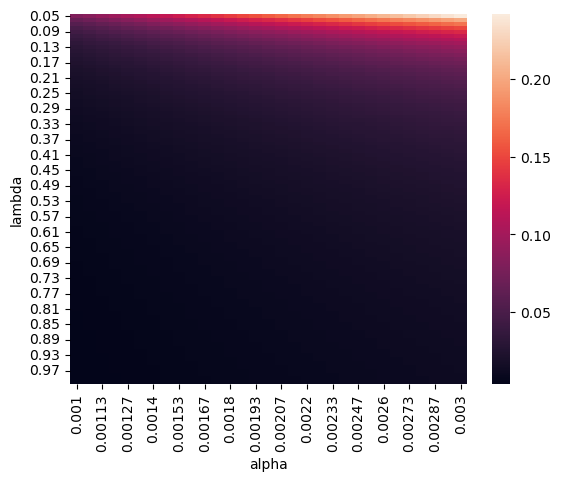

In [4]:
# heatmap
dfh = df.round(5).pivot(index='lambda',columns='alpha', values ='epsilon')
# plt.figure(figsize=(15,15))
sns.heatmap(dfh)

# pairwise plots

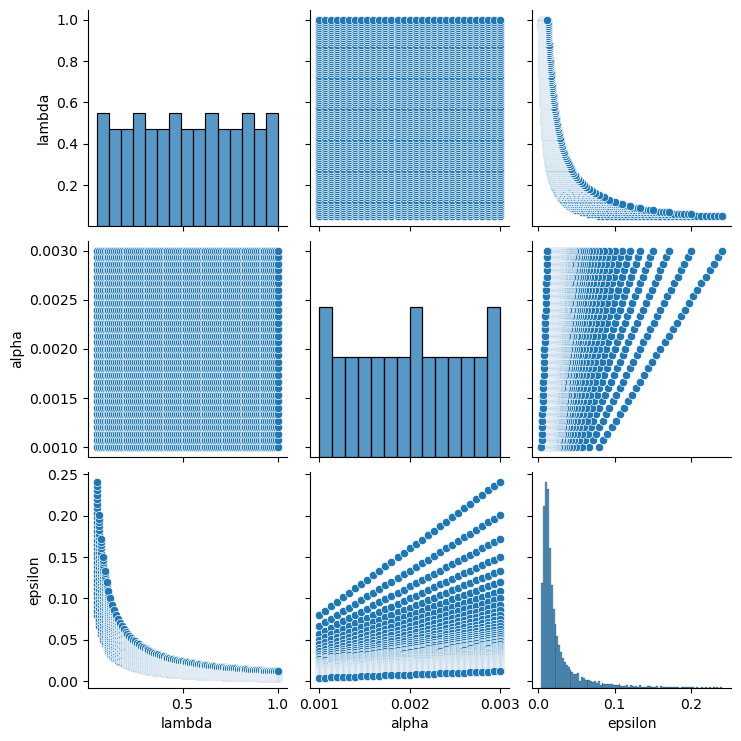

In [5]:
sns.pairplot(df)

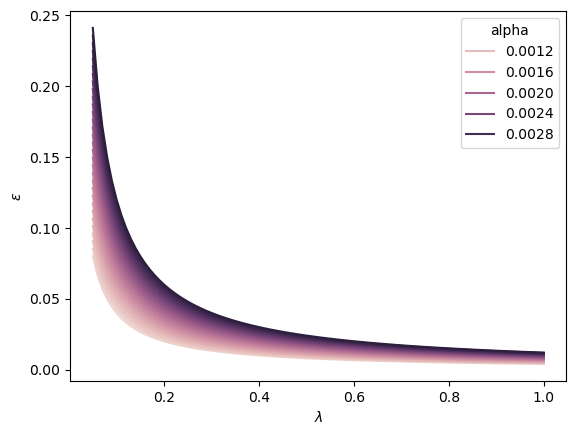

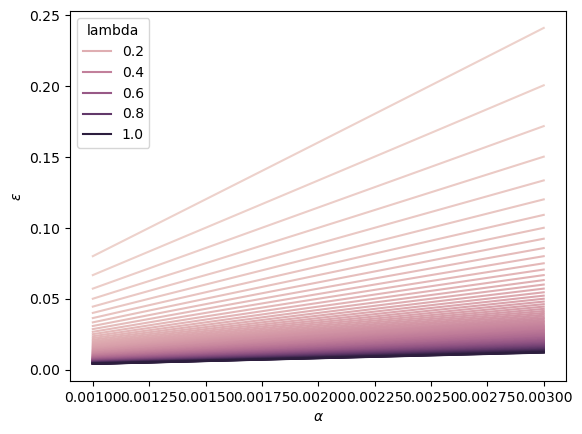

In [6]:
for x,y,hue in [('lambda','epsilon','alpha'),
                ('alpha','epsilon', 'lambda'),
               ]:
    plt.figure()
    sns.lineplot(data=df,
                 x=x,
                 y=y,
                 hue=hue
                )
    plt.xlabel(f'$\\{x}$')
    plt.ylabel(f'$\\{y}$')
    

# surface plot 

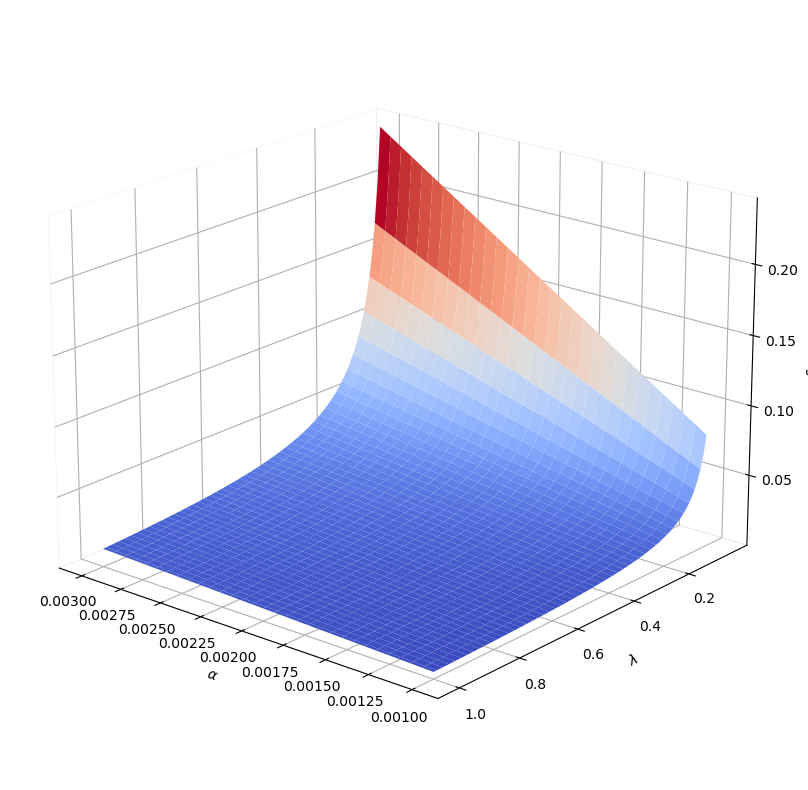

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# ax.set_zscale('log')
# Plot the surface.
surf = ax.plot_surface(A, L, EPS, 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=True)
ax.view_init(20,130)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\lambda$')
ax.set_zlabel('$\\epsilon$')
for i in [ax.xaxis, ax.yaxis, ax.zaxis]:
    i.pane.fill = False

## Q2: bound on $\alpha$-multical given $\epsilon$-DC

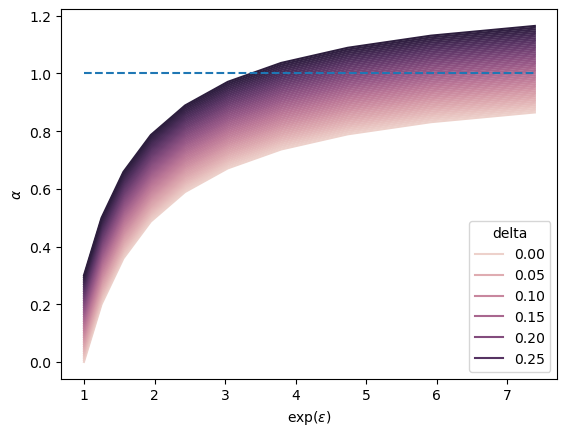

In [8]:
eps = np.linspace(0.0,2.,10)
delta = np.linspace(0.0,0.3,50)

frames = [
         {
          'epsilon': e,   
          'delta':d,
          'exp(\\epsilon)': np.exp(e),   
          'alpha':1-np.exp(-e) + d   
         }
         for e in eps for d in delta
        ]

df = pd.DataFrame.from_records(frames)

x,y,hue = ('exp(\\epsilon)', 'alpha','delta')
plt.figure()
sns.lineplot(data=df,
             x=x,
             y=y,
             hue=hue
            )
plt.xlabel(f'$\\{x}$')
plt.ylabel(f'$\\{y}$')
    
plt.plot([np.min(df[x]),np.max(df[x])],[1,1],'--')

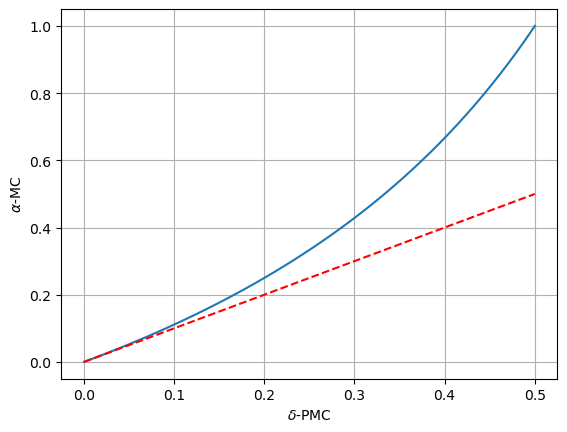

In [9]:
import numpy as np

delta = np.linspace(0,0.5,100)

plt.plot(delta, delta/(1-delta))
# plt.plot([.5,.5],[0,1],'--r')
plt.plot([0,.5],[0,.5], '--r')
plt.xlabel('$\\delta$-PMC')
plt.ylabel('$\\alpha$-MC')
plt.gca().grid(True)

# plot comparing PMC, MC, and DC

- left subplot: x-axis is epsilon-DC, and y-axis is alpha
    - plot alpha for MC, PMC
- right subplot: x-axis is alpha-MC
    - plot epsilon-DC, alpha-PMC 

In [10]:

def PMCtoMC(alpha, r=None):
    """given delta-PMC, return alpha-MC bound"""
    return alpha/(1-alpha)
def PMCtoDC(alpha, r=None):
    """given alpha-PMC, return eps-DC bound"""
    return np.log((1+alpha)/(1-alpha))
def MCtoDC(alpha, rmin):
    """given alpha-MC, return eps-DC bound"""
    return np.log((rmin+alpha)/(rmin-alpha))
def DCtoMC(eps, delta):
    """given eps-DC and delta-calibration, return alpha-MC bound"""
    return 1-np.exp(-eps)+delta

rmin = np.linspace(0.01,1.0,101)
alpha = np.linspace(0.01,1.0, 100)
eps = np.linspace(0.0,2.,101)
delta = np.linspace(0.0,0.5,11)
# delta = [0.0,.25,0.5]
PMC = '$\\alpha$-PMC model'
MC = '$\\alpha$-MC model'
DC = '$\\varepsilon$-DC model'
delta_name = f'{DC}\n$\\delta$-calibration:'
frames = []
for a in alpha:
    entry = {
        'in':PMC,
        'in_value':a,
        'out':DC,
        'out_value':PMCtoDC(a) 
    }
    frames.append(entry)
    entry = {
        'in':PMC,
        'in_value':a,
        'out':MC,
        'out_value':PMCtoMC(a) 
    }
    frames.append(entry)
    for r in rmin:
        entry = {
            'in':MC,
            'in_value':a,
            'out':DC,
            'rmin':r,
            'out_value':MCtoDC(a,r) 
        }
        frames.append(entry)
for e in eps:
    for d in delta:
        entry = {
            'in':DC,
            'in_value':e,
            'out':MC,
            delta_name:d,
            'out_value':DCtoMC(e,d) 
        }
        frames.append(entry)
                

df = pd.DataFrame.from_records(frames)


df

/tmp/ipykernel_3340473/548779663.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return np.log((rmin+alpha)/(rmin-alpha))
/tmp/ipykernel_3340473/548779663.py:9: RuntimeWarning: invalid value encountered in log
  return np.log((rmin+alpha)/(rmin-alpha))
/tmp/ipykernel_3340473/548779663.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.log((1+alpha)/(1-alpha))
/tmp/ipykernel_3340473/548779663.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return alpha/(1-alpha)


,in,in_value,out,out_value,rmin,$\varepsilon$-DC\n$\delta$-calibration:
0,$\alpha$-PMC,0.01,$\varepsilon$-DC,0.020001,NaN,NaN
1,$\alpha$-PMC,0.01,$\alpha$-MC,0.010101,NaN,NaN
2,$\alpha$-MC,0.01,$\varepsilon$-DC,inf,0.0100,NaN
3,$\alpha$-MC,0.01,$\varepsilon$-DC,1.105324,0.0199,NaN
4,$\alpha$-MC,0.01,$\varepsilon$-DC,0.698185,0.0298,NaN
...,...,...,...,...,...,...
11406,$\varepsilon$-DC,2.00,$\alpha$-MC,1.164665,NaN,0.30
11407,$\varepsilon$-DC,2.00,$\alpha$-MC,1.214665,NaN,0.35
11408,$\varepsilon$-DC,2.00,$\alpha$-MC,1.264665,NaN,0.40
11409,$\varepsilon$-DC,2.00,$\alpha$-MC,1.314665,NaN,0.45


FileNotFoundError: [Errno 2] No such file or directory: '../overleaf/figs/parameter_comparison.pdf'

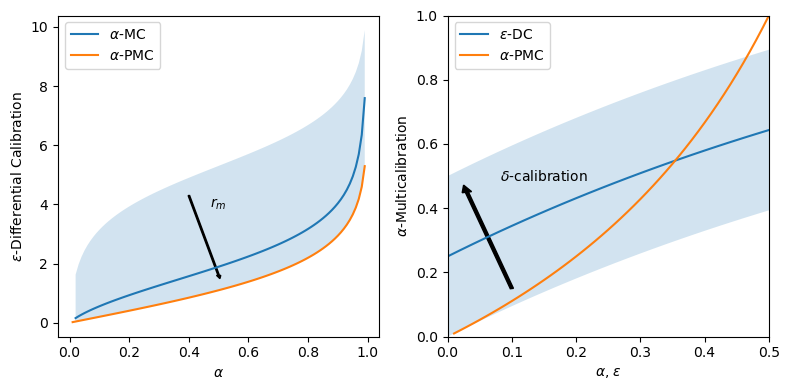

In [11]:
import seaborn as sns

h,axes = plt.subplots(1,2, figsize=(8,4))

ax = axes[0]
dfplt = df.loc[df.out==DC]
df_mc = dfplt.loc[dfplt['in']==MC]
x = df_mc.groupby('in_value')['in_value'].mean()
mc_middle = df_mc.groupby('in_value')['out_value'].mean()
mc_min = df_mc.groupby('in_value')['out_value'].min()
mc_max = df_mc.groupby('in_value')['out_value'].max()

ax.plot(
    x,
    mc_middle,
    label=MC
)
ax.fill_between(
    x,
    mc_min,
    mc_max,
    alpha=0.2
)

ax.arrow(
    x=.4, 
    y=1.6+2.7, 
    dx=.1, 
    dy=-2.7, 
    width=.005,
    facecolor='k',
    edgecolor=None,
    head_width=.014,
    head_length=.11
) 
ax.text(
        s=f'$r_{min}$',
        x=0.5, 
        y=4,
#         rotation=30,
        ha='center',
        va='center'
       )
# ax.text(
#         s=f'$r_m$={df["rmin"].max()}',
#         x=0.2, 
#         y=.7,
#         rotation=30,
#         ha='center',
#         va='center'
#        )
df_pmc = dfplt.loc[dfplt['in']==PMC]
ax.plot(
    df_pmc['in_value'],
    df_pmc['out_value'],
    label=PMC
)
ax.legend(loc='upper left')
########################################
plt.sca(ax)
plt.xlabel('Value of $\\alpha$')
plt.ylabel('$\\varepsilon$-Differential Calibration Bound')

ax = axes[1]
dfplt = df.loc[df.out==MC]
df_dc = dfplt.loc[dfplt['in']==DC]
x = df_dc.groupby('in_value')['in_value'].mean()
dc_middle = df_dc.groupby('in_value')['out_value'].mean()
dc_min = df_dc.groupby('in_value')['out_value'].min()
dc_max = df_dc.groupby('in_value')['out_value'].max()

ax.plot(
    x,
    dc_middle,
    label=DC
)
ax.fill_between(
    x,
    dc_min,
    dc_max,
    alpha=0.2
)
i = round(len(x)/2)
ax.arrow(
    x=.1, 
    y=0.15, 
    dx=-.07, 
    dy=.3, 
    width=.005,
    facecolor='k',
    edgecolor=None
) 
ax.text(
#         s=f'$\\delta$-calibration={df[delta_name].min()}',
        s=f'$\\delta$-calibration',
        x=0.15, 
        y=.5,
#         rotation=30,
        ha='center',
        va='center'
       )
df_pmc = dfplt.loc[dfplt['in']==PMC]
ax.plot(
    df_pmc['in_value'],
    df_pmc['out_value'],
    label=PMC
)
ax.legend(loc='upper left')
plt.sca(ax)
plt.xlim(0,0.5)
plt.ylim(0,1)
plt.xlabel('Value of $\\alpha$, $\\varepsilon$')
plt.ylabel('$\\alpha$-Multicalibration Bound')
plt.tight_layout()
h.savefig('figs/parameter_comparison.pdf',
          dpi=300,
          bbox_inches='tight'
         )

In [ ]:
g= sns.relplot(
    data=df,
    kind='line',
    x='in_value',
    y='out_value',
    hue='in',
    col='out',
#     estimator=None,
    facet_kws=dict(sharex=False, sharey=False)
)
# g.set(
#     ylim=[0,1.0],
#     xlim=[0,1.0]
#      )